In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report

plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
# import the iris data
iris = datasets.load_iris()

print(iris.feature_names)
# only print the first 10 samples
print(iris.data[:10])
print('We have %d data samples with %d \
    features'%(iris.data.shape[0], iris.data.shape[1]))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
We have 150 data samples with 4     features


In [3]:
print(iris.target_names)
print(set(iris.target))

['setosa' 'versicolor' 'virginica']
{0, 1, 2}


In [4]:
# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

We have 3 classes in the data


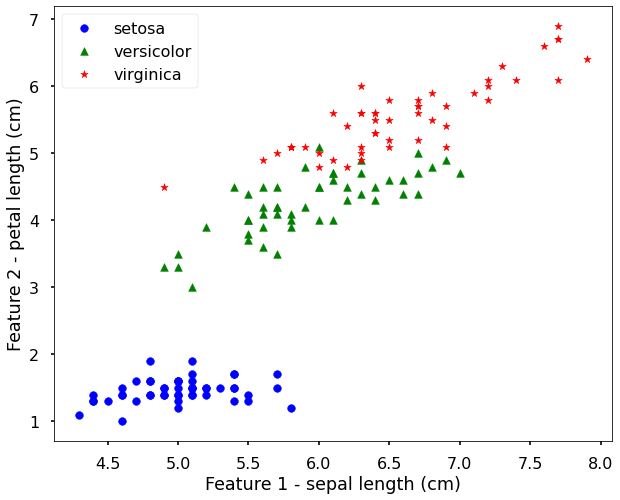

In [5]:
# let's have a look of the data first
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), colors, symbols)):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

In [6]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier with data
clf.fit(X,y)

SVC(kernel='linear')

In [7]:
# predict on the data
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

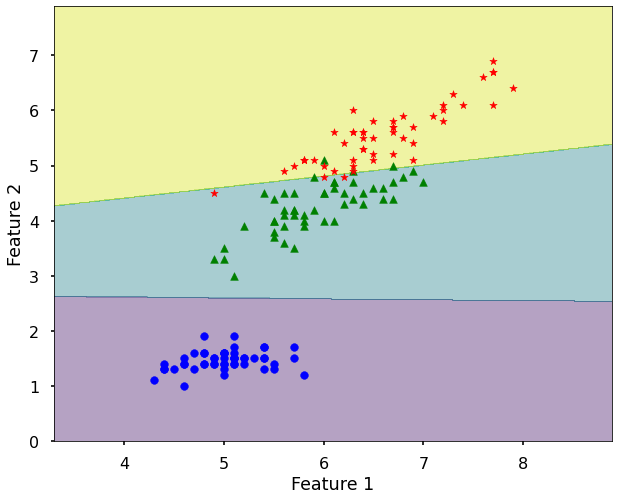

In [8]:
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    for i, c, s in (zip(range(n_class), colors, symbols)):
        ix = y == i
        plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                    color = c, marker = s, s = 60, \
                    label = target_names[i])
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
plot_desicion_boundary(X, y, clf)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-poster')
%matplotlib inline

<ErrorbarContainer object of 3 artists>

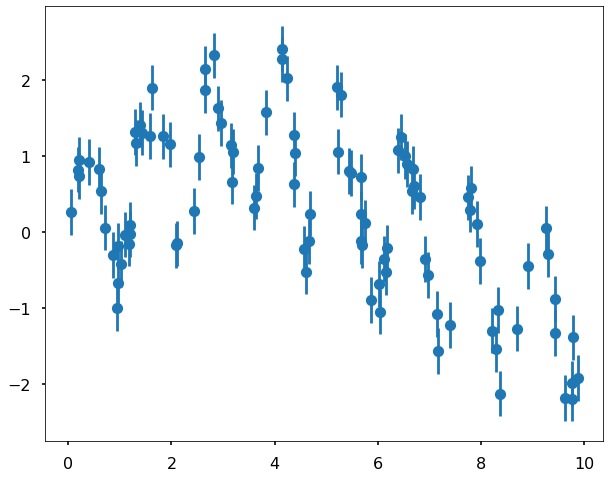

In [10]:
np.random.seed(0)
x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

plt.figure(figsize = (10,8))
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

In [11]:
from sklearn.neural_network import MLPRegressor

c:\users\lgdr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


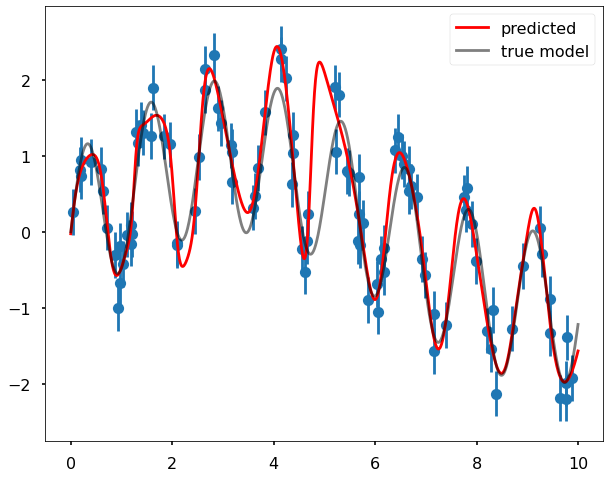

In [12]:
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200), \
                   max_iter = 2000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', \
                   random_state = 8)

xfit = np.linspace(0, 10, 1000)
ytrue = model(xfit, 0)
yfit = mlp.fit(x[:, None], y).predict(xfit[:, None])

plt.figure(figsize = (10,8))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', \
         zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, \
         label = 'true model', zorder = 10)
plt.legend()
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn-poster')
%matplotlib inline

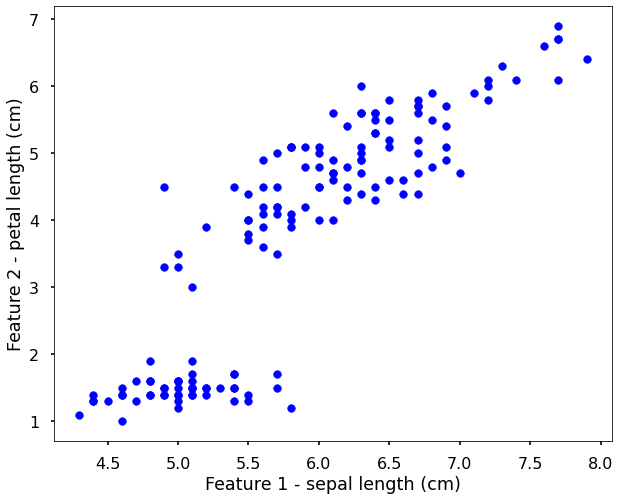

In [14]:
# import the iris data
iris = datasets.load_iris()
# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))

# let's have a look of the data first
plt.figure(figsize = (10,8))

plt.scatter(X[:, 0], X[:, 1], \
            color = 'b', marker = 'o', s = 60)

plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

In [15]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, random_state = 0)
kmean.fit(X)

KMeans(n_clusters=3, random_state=0)

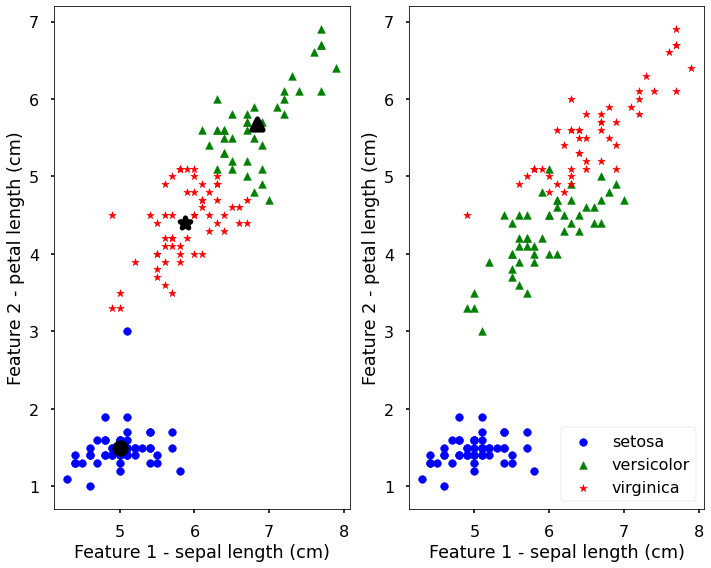

In [16]:
# let's have a look of the data first
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i, c, s in (zip(range(n_class), colors, symbols)):
    ix = kmean.labels_ == i
    ax.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])
    loc = kmean.cluster_centers_[i]
    ax.scatter(loc[0], loc[1], color = 'k', \
               marker = s, linewidth = 5)
    
    ix = y == i
    ax2.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])
    

plt.legend(loc = 4, scatterpoints = 1)
ax.set_xlabel('Feature 1 - ' + feature_names[0])
ax.set_ylabel('Feature 2 - ' + feature_names[2])
ax2.set_xlabel('Feature 1 - ' + feature_names[0])
ax2.set_ylabel('Feature 2 - ' + feature_names[2])
plt.tight_layout()
plt.show()

In [17]:
new_points = np.array([[5, 2], 
                      [6, 5]])
kmean.predict(new_points)

array([0, 2])